In [1]:
import os, sys
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.start_workers(20)

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.1.6:58073 Dashboard: http://10.148.1.6:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


---

# store grid

In [5]:
ds_index, ds = get_compressed_level_index(grid_dir)
#print(ds)

ds = ds.drop(['dxG','dyG','dxC','dyC','rAw','rAs','rAz'])
ds = ds.drop(['hFacC','hFacW','hFacS'])
ds = ds.drop(['Z', 'Zp1', 'Zu', 'Zl', 'drC', 'drF','PHrefC','PHrefF'])

#Nc = 432 # original choice
#Nc = 27 # very long scheduling
Nc = 96
ds = ds.chunk({'i': Nc, 'j': Nc, 'i_g': Nc, 'j_g': Nc})

print(ds)

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 96, 96)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 96, 96)>
    

In [10]:
out_dir = scratch+'/'
#out_dir = osi

In [11]:
file_out = out_dir+'mit_grid.zarr'
%time ds.to_zarr(file_out, mode='w')

In [12]:
dst = ds.transpose('face', 'i', 'j', 'i_g', 'j_g', 'k', 'k_l', 'k_p1', 'k_u')
print(dst)

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, i, j) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 96, 96)>
    YC       (face, i, j) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 96, 96)>
    

In [13]:
file_out = out_dir+'mit_grid_t.zarr'
%time dst.to_zarr(file_out, mode='w')

CPU times: user 4min 15s, sys: 6.49 s, total: 4min 21s
Wall time: 4min 30s


--- 

## standard data layout: (face, time, j, i) chunks = (1, 1, 4320, 4320)

V = ['Eta', 'SST', 'SSS', 'SSU', 'SSV']
V = ['SSU', 'SSV']

#Nt = 1
#
#Nc = 432 # original choice
#Nc = 27 # very long scheduling
#Nc = 96 #
#Nc = 288
#Nc = 864

out_dir = scratch+'/mit_zarr/'

for v in V:
    #
    data_dir = root_data_dir+v+'/'
    iters, time = get_iters_time(v, data_dir, delta_t=25.)
    #
    p = 'C'
    if v is 'SSU':
        p = 'W'
    elif v is 'SSV':
        p = 'S'
    #
    ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
    ds = ds.chunk({'face': 1})
    # 
    dv = ds[v]
    # should store grid data independantly in a single file
    dv = dv.drop(['XC','YC','Depth','rA']).to_dataset()        
    #
    #dv = dv.chunk({'i': Nc, 'j': Nc}) # scheduler does not like this, i.e. takes a long time to do anything
    #
    file_out = out_dir+'/%s.zarr'%(v)
    try:
        print(dv)
        %time dv.to_zarr(file_out, mode='w')                    
    except:
        print('Failure')
    dsize = getsize(file_out)
    print('   data is %.1fGB ' %(dsize/1e9))

---
## try to load standard lay out, rechunk and store right away

Does work now !

In [26]:
# parameters for rechunking

Nt = 24*10 # time chunks
#Nt = 0
#
Nt = len(ds.time) if Nt == 0 else Nt

#Nc = 432 # original choice
#Nc = 27 # very long scheduling
Nc = 96
#Nc = 288
#Nc = 864

### all faces, all variables

not working: runs out of memory

In [ ]:
# same but over all variables
V = ['SSU', 'SSV']

out_dir = scratch+'/mit_zarr_rc/'

for v in V:

    file_in = scratch+'/mit_zarr/%s.zarr'%(v)
    ds0 = xr.open_zarr(file_in)
    #
    #ds = ds0.isel(face=face)
    #
    ds = ds.isel(time=slice(len(ds.time)//Nt *Nt))
    #
    ds = ds.chunk({'time': Nt, 'i': Nc, 'j': Nc})
    #
    #ds = ds.transpose('i','j','time') 
    # not sure this is necessary with zarr, i.e. in memory transpose 
    # should be fast 

    # tmp, xarray zarr backend bug: 
    # https://github.com/pydata/xarray/issues/2278
    del ds['face'].encoding['chunks']
    del ds[v].encoding['chunks']

    file_out = out_dir+'%s.zarr'%(v)
    try:
        %time ds.to_zarr(file_out, mode='w')
    except:
        print('Failure')
    dsize = getsize(file_out)
    print(' %s  data is %.1fGB ' %(v, dsize/1e9))

### one face at a time, all variables

working

In [ ]:
# same but over all variables and faces
V = ['SSU', 'SSV']

out_dir = scratch+'/mit_zarr_rc/'

for v in V:

    file_in = scratch+'/mit_zarr/%s.zarr'%(v)
    ds0 = xr.open_zarr(file_in)
    
    #for face in range(ds0['face'].size):
    for face in [1]:
        
        ds = ds0.isel(face=face)
        #
        ds = ds.isel(time=slice(len(ds.time)//Nt *Nt))
        #
        ds = ds.chunk({'time': Nt, 'i': Nc, 'j': Nc})
        #
        #ds = ds.transpose('i','j','time') 
        # not sure this is necessary with zarr, i.e. in memory transpose 
        # should be fast 

        # tmp, xarray zarr backend bug: 
        # https://github.com/pydata/xarray/issues/2278
        del ds['face'].encoding['chunks']
        del ds[v].encoding['chunks']
        
        file_out = out_dir+'%s_f%02d.zarr'%(v,face)
        try:
            #print(ds)
            %time ds.to_zarr(file_out, mode='w')
        except:
            print('Failure')
        dsize = getsize(file_out)
        print(' %s face=%d  data is %.1fGB ' %(v, face, dsize/1e9))


### all faces, test with one variable

not working, runs out of memory

In [ ]:
v = 'SSU'
file_in = scratch+'/mit_zarr/%s.zarr'%(v)
ds = xr.open_zarr(file_in)
print(ds)

In [ ]:
out_dir = scratch+'/mit_zarr_rc/'

# necessary?, yes to load in memory
# also suffers from: https://github.com/pydata/xarray/issues/2278
#ds = ds.isel(face=face)
ds = ds.isel(face=[1,2])

#
ds = ds.isel(time=slice(len(ds.time)//Nt *Nt))
#
ds = ds.chunk({'time': Nt, 'i': Nc, 'j': Nc})
#
#ds = ds.transpose('i','j','time') # not sure this is necessary with zarr, i.e. in memory transpose should be fast 

# tmp, xarray zarr backend bug: https://github.com/pydata/xarray/issues/2278
#del ds['face'].encoding['chunks']
del ds[v].encoding['chunks']

print(ds)

In [ ]:
#file_out = out_dir+'%s_f%02d.zarr'%(v,face)
file_out = out_dir+'%s.zarr'%(v)
try:
    print(ds)
    %time ds.to_zarr(file_out, mode='w')
except:
    print('Failure')
dsize = getsize(file_out)
print('   data is %.1fGB ' %(dsize/1e9))

### one face at a time, test with one variable

working

In [28]:
v = 'SSU'
face = 1
file_in = scratch+'/mit_zarr/%s.zarr'%(v)
ds = xr.open_zarr(file_in)
print(ds)

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, j: 4320, time: 8785)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8785,), chunksize=(8785,)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...
Data variables:
    SSU      (time, face, j, i) float32 dask.array<shape=(8785, 13, 4320, 4320), chunksize=(1, 1, 4320, 4320)>


In [29]:
out_dir = scratch+'/mit_zarr_rc/'

# necessary?, yes to load in memory
# also suffers from: https://github.com/pydata/xarray/issues/2278
ds = ds.isel(face=face)
#
ds = ds.isel(time=slice(len(ds.time)//Nt *Nt))
#
ds = ds.chunk({'time': Nt, 'i': Nc, 'j': Nc})
#
#ds = ds.transpose('i','j','time') # not sure this is necessary with zarr, i.e. in memory transpose should be fast 

# tmp, xarray zarr backend bug: https://github.com/pydata/xarray/issues/2278
del ds['face'].encoding['chunks']
del ds[v].encoding['chunks']

print(ds)

<xarray.Dataset>
Dimensions:  (face: 2, i: 4320, j: 4320, time: 8640)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8640,), chunksize=(240,)>
  * face     (face) int64 1 2
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...
Data variables:
    SSU      (time, face, j, i) float32 dask.array<shape=(8640, 2, 4320, 4320), chunksize=(240, 1, 96, 96)>


In [7]:
#%time ds = ds.load() # run fine but at the end memory blows on the scheduler side
#%time ds = ds.persist() # still necessary?, worse it actually provoques memory crash

In [ ]:
file_out = out_dir+'%s_f%02d.zarr'%(v,face)
try:
    print(ds)
    %time ds.to_zarr(file_out, mode='w')
except:
    print('Failure')
dsize = getsize(file_out)
print('   data is %.1fGB ' %(dsize/1e9))

In [9]:
#del ds

In [10]:
ds = xr.open_zarr(file_out)
print(ds)

<xarray.Dataset>
Dimensions:  (i: 4320, j: 4320, time: 8640)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8640,), chunksize=(8640,)>
    face     int64 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...
Data variables:
    SSU      (time, j, i) float32 dask.array<shape=(8640, 4320, 4320), chunksize=(240, 96, 96)>


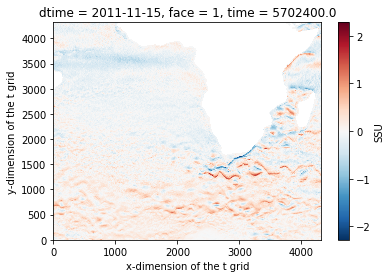

In [12]:
ds[v].isel(time=0).plot()

--- 

# try to read binaries and rechunk all at the same time

# transposed data: (i,j,time), 1 storage per face

Not working at the moment, not enough memory

In [ ]:
V = ['Eta', 'SST', 'SSS', 'SSU', 'SSV']
V = ['SSU']

Nt = 24*10 # time chunks
#Nt = 0

#Nc = 432 # original choice
Nc = 96 #
#Nc = 27 # very long scheduling

out_dir = scratch+'/mit_zarr_t/'
#out_dir = datawork+'/mit_zarr_t/'
#out_dir = osi+'mit_zarr_t/'

for v in V:
    #
    data_dir = root_data_dir+v+'/'
    iters, time = get_iters_time(v, data_dir, delta_t=25.)
    #
    p = 'C'
    if v is 'SSU':
        p = 'W'
    elif v is 'SSV':
        p = 'S'
    #
    ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
    #
    lNt = len(ds.time) if Nt == 0 else Nt
    # tmp
    #ds = ds.isel(face=slice(1,3))
    ds = ds.isel(face=1) # seems to fix issue with memory blow up
    # maybe chunk along face here
    #
    dv = ds[v].isel(time=slice(len(ds.time)//lNt *lNt))
    print(dv)
    #
    dv = dv.drop(['XC','YC','Depth','rA']).to_dataset()
    #
    #dv = dv.chunk({'time': lNt})
    dv = dv.chunk({'time': lNt, 'i': Nc, 'j': Nc})
    #dv = dv.chunk({'face': 1, 'time': lNt, 'i': Nc, 'j': Nc})
    #
    #dv = dv.transpose('face','i','j','time') # commented tmp, still leads to memory blow up
    #
    file_out = out_dir+'%s.zarr'%(v)
    try:
        print(dv)
        %time dv.to_zarr(file_out, mode='w')
    except:
        print('Failure')
    dsize = getsize(file_out)
    print('   data is %.1fGB ' %(dsize/1e9))


In [ ]:
V = ['Eta', 'SST', 'SSS', 'SSU', 'SSV']
V = ['SSU']

Nt = 24*10 # time chunks
Nt = 0
out_dir = scratch+'/mit_zarr_t/'
#out_dir = datawork+'/mit_zarr_t/'
#out_dir = osi+'mit_zarr_t/'

for v in V:
    #
    data_dir = root_data_dir+v+'/'
    iters, time = get_iters_time(v, data_dir, delta_t=25.)
    #
    p = 'C'
    if v is 'SSU':
        p = 'W'
    elif v is 'SSV':
        p = 'S'
    #
    ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
    #
    if Nt == 0:
        Nt = len(ds.time)
    #
    #for face in range(ds['face'].size):
    for face in [1]:
        file_out = out_dir+'%s_f%02d.zarr'%(v,face)
        if not os.path.isfile(file_out) or getsize(file_out) < fsize_bound:
            #dv = ds[v].isel(face=face) # does not work, incompatible zarr chunks
            dv = ds[v].isel(face=face, time=slice(len(ds.time)//Nt *Nt))
            # should store grid data independantly in a single file
            dv = dv.drop(['XC','YC','Depth','rA']).to_dataset()
            #
            dv = dv.chunk({'time': Nt, 'i': 432, 'j': 432})
            dv = dv.transpose('i','j','time')
            #
            try:
                %time dv.to_zarr(file_out, mode='w')
            except:
                print('Failure')
            dsize = getsize(file_out)
            print('face=%d / i=%d'%(face,i))
            print('   data is %.1fGB ' %(dsize/1e9))
        else:
            print('face=%d / i=%d - allready processed'%(face,i))

---

In [17]:
w = cluster.start_workers(10)

In [ ]:
client.restart()

In [1]:
# kill scheduler, workers
cluster.scheduler.close()
#cluster.stop_workers(cluster.jobs)

NameError: name 'cluster' is not defined